<a href="https://colab.research.google.com/github/JohnMorrisonn/African-Economic-Crisis/blob/master/Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Africa Kaggle Dataset Merged with Gapminder Country Data

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving african_crises.csv to african_crises.csv


In [0]:
# African Economic Data set from Kaggle
df = pd.read_csv('african_crises.csv')

# Gapminder Data set 
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
# Merge Gapminder dfs
df2 = pd.merge(income, lifespan)
df2 = pd.merge(df2, population)

# Rename variables to match
entities_variables = ['country', 'name', 'world_6region']
entities = entities[entities_variables]

# Merge according to df2
df2 = pd.merge(df2, entities, left_on='geo', right_on='country')

# Rename to merged dataset and rename columns
merged = df2
merged = merged.drop(['geo', 'country'], axis='columns')
merged = merged.rename(columns = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years' : 'lifespan',
    'population_total':'population',
    'name' : 'country',
    'world_6region' : 'region'
})

In [0]:
# Rename columns of Africa df
df.rename(columns = {
    'domestic_debt_in_default': 'domestic_debt',
    'sovereign_external_debt_default' : 'se_debt',
    'gdp_weighted_default' : 'gdp',
    'inflation_annual_cpi' : 'inflation',
    'inflation_crises': 'Inflation Crisis'
}, inplace=True)

# Change string values to binary for crises
df['banking_crisis'] = df['banking_crisis'].replace({'crisis': 1, 'no_crisis': 0})

In [6]:
# Create a list of the countries in the African df
africa_countries = df.country.sort_values().unique().tolist()
africa_countries
# Replace 'Cote d'Ivore' in the Gapminder merged df
merged.country = merged.country.replace({"Cote d'Ivoire" : "Ivory Coast"})
merged.country.sort_values().unique()
# Create new Gapminder df of the countries that are in the African df
merged_africa = merged[merged.country.isin(africa_countries)]
print(merged_africa.shape)
merged_africa.head()

(2847, 6)


,year,income,lifespan,population,country,region
219,1800,618,26.98,1567028,Angola,sub_saharan_africa
220,1801,620,26.98,1567028,Angola,sub_saharan_africa
221,1802,623,26.98,1567028,Angola,sub_saharan_africa
222,1803,626,26.98,1567028,Angola,sub_saharan_africa
223,1804,628,26.98,1567028,Angola,sub_saharan_africa


In [0]:
# Create new df of the cleaned Kaggle and Gapminder datasets
africa = pd.merge(df, merged_africa, how='inner', on=['country', 'year'])
africa.head()
# Save the cleaned df to a new csv for future use
df_csv = africa.to_csv('New Africa.csv')
files.download('New Africa.csv')

In [8]:
# Mount drive to load in new saved csv
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Upload the df without the columns you 
africa = pd.read_csv('/content/drive/My Drive/New Africa.csv')
africa.head()
# Unnamed column appeared, drop it
africa = africa.drop('Unnamed: 0', axis=1)

In [26]:
africa.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt,se_debt,gdp,inflation,independence,currency_crises,Inflation Crisis,banking_crisis,income,lifespan,population,region
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,1263,22.00,3811028,middle_east_north_africa
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,1277,28.86,3841635,middle_east_north_africa
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,1291,28.90,3872845,middle_east_north_africa
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0,1305,28.94,3902099,middle_east_north_africa
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,1319,28.98,3934634,middle_east_north_africa


In [0]:
# Years after 1980 are of interest
africa = africa[africa['year'] > 1980]

# Create a condition for each country for future use
alg = africa[africa['country'] == 'Algeria']
ang = africa[africa['country'] == 'Angola']
car = africa[africa['country'] == 'Central African Republic']
egy = africa[africa['country'] == 'Egypt']
ivc = africa[africa['country'] == 'Ivory Coast']
ken = africa[africa['country'] == 'Kenya']
mau = africa[africa['country'] == 'Mauritius']
mor = africa[africa['country'] == 'Morocco']
nig = africa[africa['country'] == 'Nigeria']
soa = africa[africa['country'] == 'South Africa']
tun = africa[africa['country'] == 'Tunisia']
zam = africa[africa['country'] == 'Zambia']
zim = africa[africa['country'] == 'Zimbabwe']

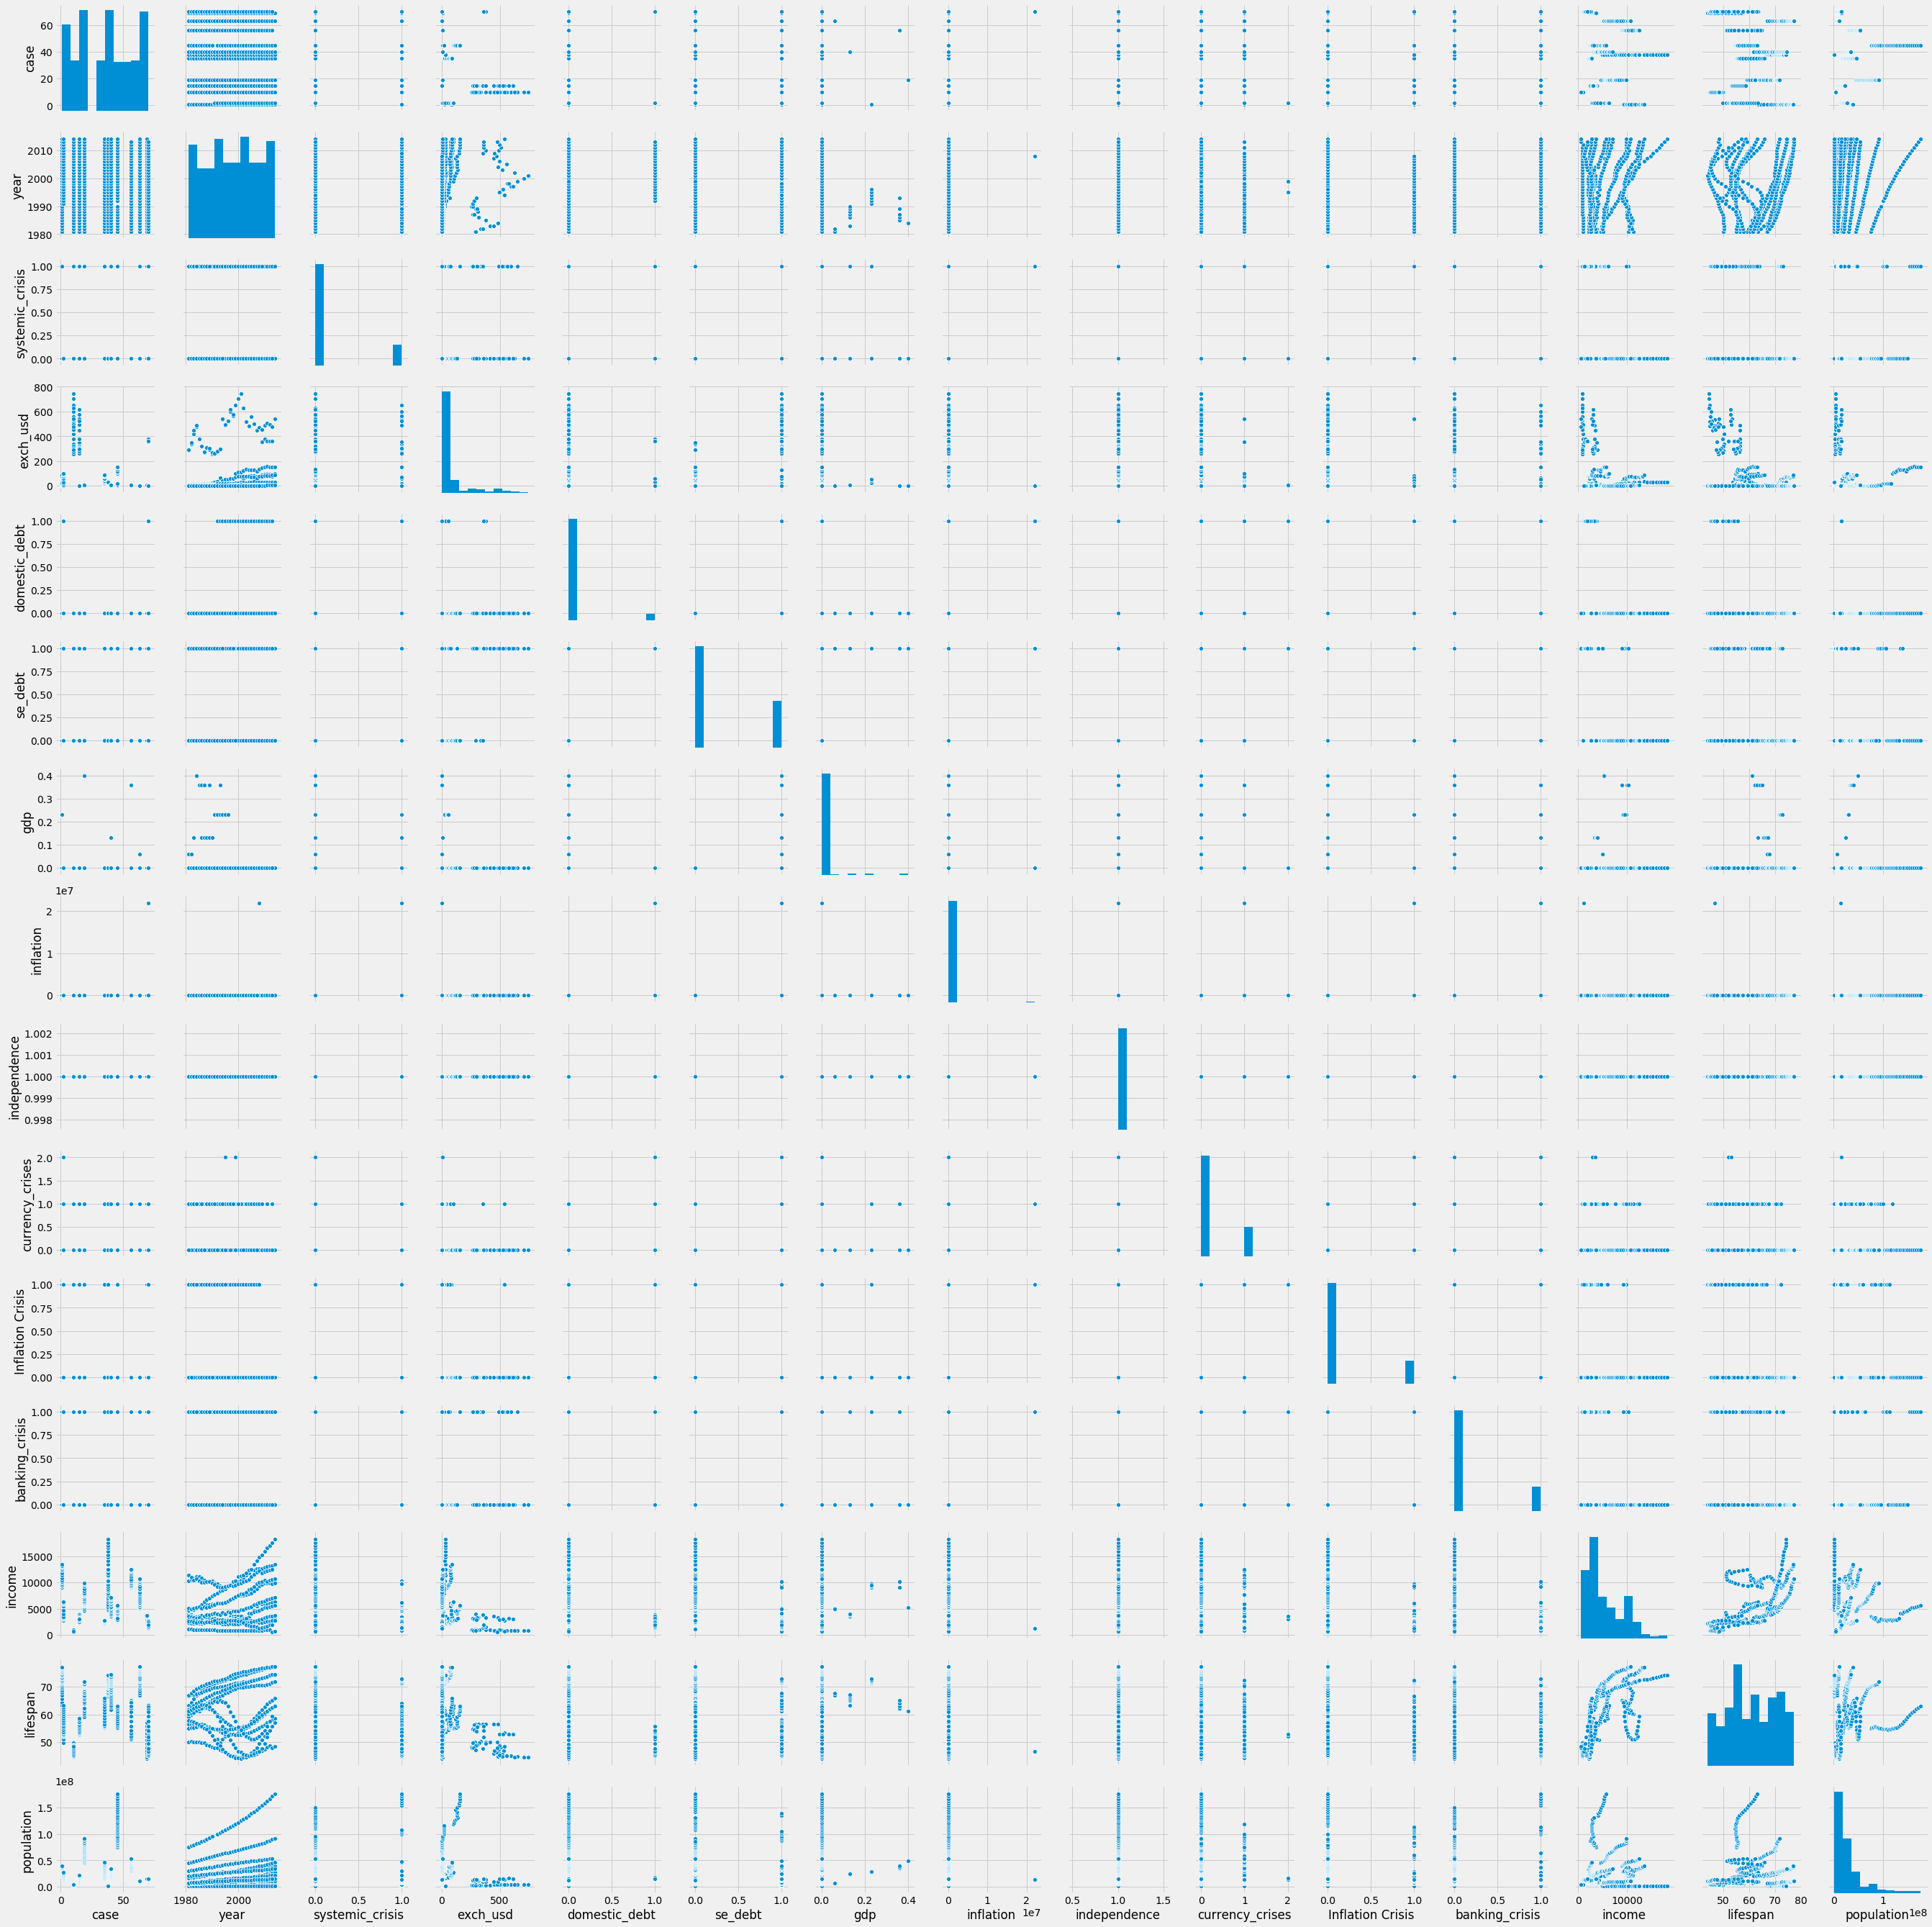

In [57]:
# Pairplot to get an idea of the data
sns.pairplot(africa)

In [0]:
# Heatmap for another view

# def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Taken from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()
    
# imp_cols = ['year', 'systemic_crisis', 'exch_usd', 'gdp', 'inflation', 'income', 'lifespan']
# correlation_heatmap(zim[imp_cols])

In [56]:
!pip install plotly

In [0]:
import plotly.express as px

In [8]:
# Choropleth of Inflation Crisis per country per year
fig = px.choropleth(africa, color='Inflation Crisis', locations='cc3', width=600, height=500, hover_name='country', animation_frame='year', color_continuous_scale=px.colors.sequential.YlOrRd, projection='equirectangular')

fig.update_layout(
    title_text = 'Africa Countries with Inflation Crisis, 1994',
    geo_scope='africa', autosize=True
)

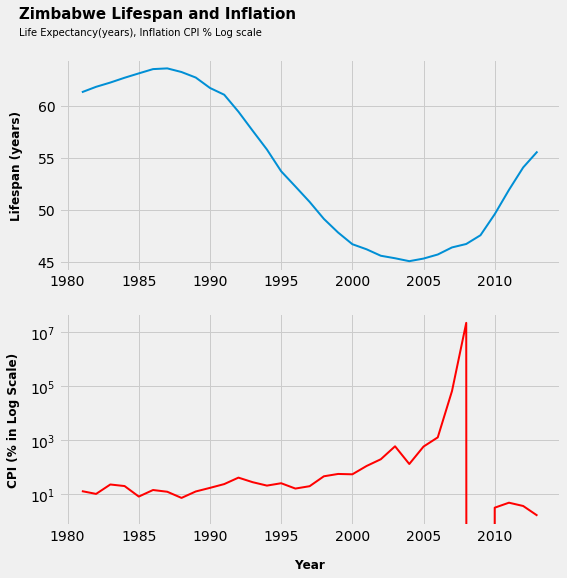

In [34]:
# Compare Extreme Inflation rates to Lifespans
import pylab
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,8))
fig.text(0.01, 0.95, 'Zimbabwe Lifespan and Inflation', fontweight="semibold", fontname='Sans', fontsize=15)
fig.text(0.01, 0.92, 'Life Expectancy(years), Inflation CPI % Log scale', fontweight="medium", fontname='Sans', fontsize=10)
ax1 = fig.add_subplot(2,1,1)
line1 = ax1.plot(zim['year'], zim['lifespan'], linewidth=2)

ax1.set_ylabel(ylabel='Lifespan (years)', fontsize=12, fontweight='semibold', labelpad=15, fontname='Sans')

ax2 = fig.add_subplot(2,1, 2)
line, = ax2.plot(zim['year'], zim['inflation'], linewidth=2, color='r')
ax2.set_yscale('log')

ax2.set_ylabel(ylabel='CPI (% in Log Scale)', fontsize=12, fontweight='semibold', labelpad=10, fontname='Sans')
ax2.set_xlabel(xlabel='Year', fontsize=12, fontweight='semibold', labelpad=15)


pylab.show()

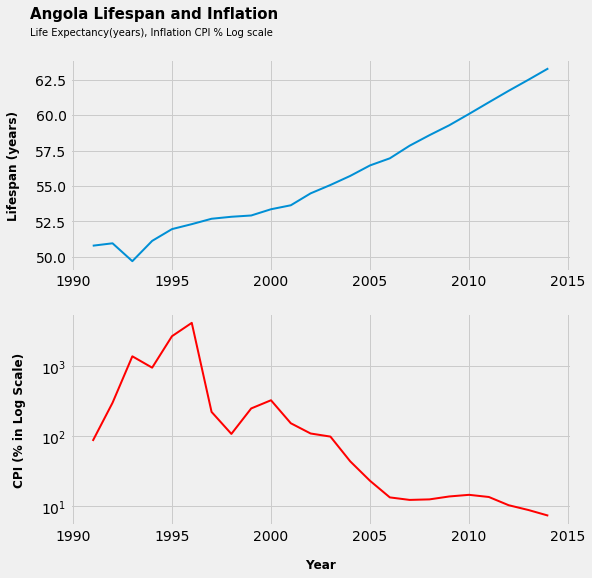

In [39]:
import pylab
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,8))
fig.text(0.01, 0.95, 'Angola Lifespan and Inflation', fontweight="semibold", fontname='Sans', fontsize=15)
fig.text(0.01, 0.92, 'Life Expectancy(years), Inflation CPI % Log scale', fontweight="medium", fontname='Sans', fontsize=10)
ax1 = fig.add_subplot(2,1,1)
line1 = ax1.plot(ang['year'], ang['lifespan'], linewidth=2)

ax1.set_ylabel(ylabel='Lifespan (years)', fontsize=12, fontweight='semibold', labelpad=15, fontname='Sans')

ax2 = fig.add_subplot(2,1, 2)
line, = ax2.plot(ang['year'], ang['inflation'], linewidth=2, color='r')
ax2.set_yscale('log')

ax2.set_ylabel(ylabel='CPI (% in Log Scale)', fontsize=12, fontweight='semibold', labelpad=15, fontname='Sans')
ax2.set_xlabel(xlabel='Year', fontsize=12, fontweight='semibold', labelpad=15)

pylab.show()

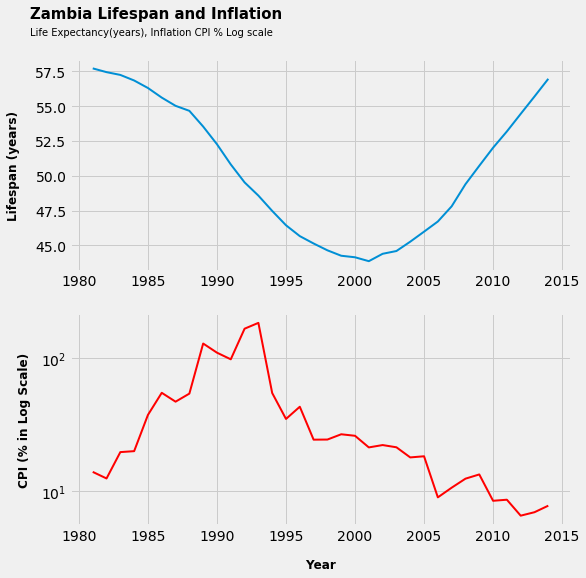

In [40]:
import pylab
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,8))
fig.text(0.01, 0.95, 'Zambia Lifespan and Inflation', fontweight="semibold", fontname='Sans', fontsize=15)
fig.text(0.01, 0.92, 'Life Expectancy(years), Inflation CPI % Log scale', fontweight="medium", fontname='Sans', fontsize=10)
ax1 = fig.add_subplot(2,1,1)
line1 = ax1.plot(zam['year'], zam['lifespan'], linewidth=2)

ax1.set_ylabel(ylabel='Lifespan (years)', fontsize=12, fontweight='semibold', labelpad=15, fontname='Sans')

ax2 = fig.add_subplot(2,1, 2)
line, = ax2.plot(zam['year'], zam['inflation'], linewidth=2, color='r')
ax2.set_yscale('log')

ax2.set_ylabel(ylabel='CPI (% in Log Scale)', fontsize=12, fontweight='semibold', labelpad=10, fontname='Sans')
ax2.set_xlabel(xlabel='Year', fontsize=12, fontweight='semibold', labelpad=15)

pylab.show()

In [0]:
africa.sort_values(by='exch_usd')

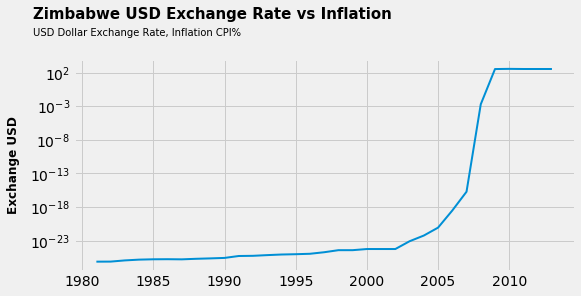

In [38]:
import pylab
import matplotlib.pyplot as plt

zim_1980 = zim[(zim['year'] > 1980)]

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,8))
fig.text(0.01, 0.95, 'Zimbabwe USD Exchange Rate vs Inflation', fontweight="semibold", fontname='Sans', fontsize=15)
fig.text(0.01, 0.92, 'USD Dollar Exchange Rate, Inflation CPI%', fontweight="medium", fontname='Sans', fontsize=10)
ax1 = fig.add_subplot(2,1,1)
line1 = ax1.plot(zim_1980['year'], zim_1980['exch_usd'], linewidth=2)
ax1.set_yscale('log')

ax1.set_ylabel(ylabel='Exchange USD', fontsize=12, fontweight='semibold', labelpad=10, fontname='Sans')

pylab.show()

In [55]:
zim['inflation'].sort_values()

1054   -7.670000e+00
1058    1.632000e+00
1055    3.217000e+00
1057    3.720000e+00
1056    4.920000e+00
1033    7.400000e+00
1030    8.300000e+00
1027    1.040000e+01
1032    1.250000e+01
1034    1.280000e+01
1026    1.320000e+01
1031    1.450000e+01
1041    1.640028e+01
1035    1.740000e+01
1042    2.006504e+01
1029    2.030000e+01
1039    2.111354e+01
1028    2.320000e+01
1036    2.400000e+01
1040    2.580874e+01
1038    2.820000e+01
1037    4.160000e+01
1043    4.661127e+01
1045    5.520370e+01
1044    5.692320e+01
1046    1.121184e+02
1049    1.327468e+02
1047    1.989286e+02
1050    5.858444e+02
1048    5.987448e+02
1051    1.281114e+03
1052    6.627989e+04
1053    2.198970e+07
Name: inflation, dtype: float64